Título do Trabalho:Análise de Imagens Citológicas com SVM e Transfer Learning

Descrição: Neste trabalho será desenvolvido um sistema de apoio ao diagnóstico para detetar metástases em gânglios linfáticos de pacientes com cancro da mama, com recurso a imagens citológicas e dados suplementares do dataset SLN-Breast.

Serão aplicados métodos de Machine Learning (ML), nomeadamente:

Support Vector Machine (SVM)
Redes Neuronais clássicas (NN)
Adicionalmente, será explorado um método de Deep learning(DL) com recurso a Transfer Learning (TL), recorrendo a modelos pré-treinados para extrair características das imagens de patologia.

Os modelos serão avaliados com métricas como exatidão, precisão, sensibilidade e matriz de confusão, comparando o desempenho entre abordagens clássicas e baseadas em deep learning.

In [1]:
#Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openslide #para carregar os ficheiros .svs
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


Carregamento e visualização do DataSet

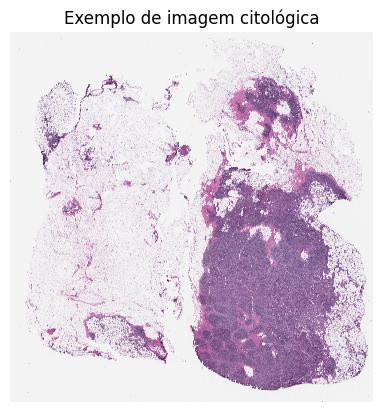

In [2]:
#carregar e visualizar as imagens 

#carregar e visualizar as imagens 

# Caminho para a pasta onde estão os ficheiros .svs
image_folder = "/Volumes/TOSHIBA EXT/Trabalho final/SLN-Breast/Treino"
image_files = os.listdir(image_folder)

# Aumentar o limite de pixels para evitar o erro DecompressionBombError
Image.MAX_IMAGE_PIXELS = None

# Carregar e mostrar uma imagem de exemplo
img_path = os.path.join(image_folder, image_files[0])
img = Image.open(img_path)

plt.imshow(img)
plt.title("Exemplo de imagem citológica")
plt.axis('off')
plt.show()

In [3]:
# Carregar dados suplementares
df = pd.read_csv("/Volumes/TOSHIBA EXT/Trabalho final/PKG - SLN-Breast/target.csv")

# Visualizar as primeiras linhas
print(df.head())

# Verificar distribuição das classes
print(df['target'].value_counts())

                     slide  target
0  HobI16-053768896760.svs       1
1  HobI16-072823783181.svs       1
2  HobI16-105105202254.svs       0
3  HobI16-303757967057.svs       0
4  HobI16-334188031493.svs       0
target
0    94
1    36
Name: count, dtype: int64


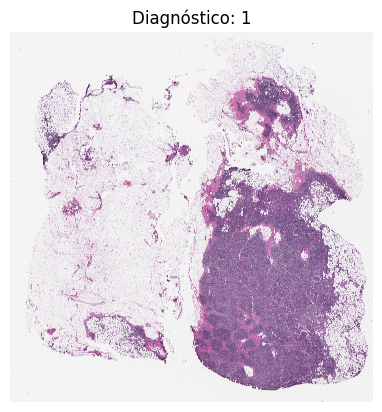

In [4]:
#Combinar as imagens com os dados do CSV
# Exemplo: carregar uma imagem com base no nome no CSV
sample = df.iloc[0]
img_path = os.path.join(image_folder, sample['slide'])
img = Image.open(img_path)

plt.imshow(img)
plt.title(f"Diagnóstico: {sample['target']}")
plt.axis('off')
plt.show()


Pré-processamento